Import the required libraries:

In [1]:
import os
import pandas as pd

Load the CPT data:

In [2]:
cpt_data = pd.read_csv(os.path.join('..', 'data', '249769_cpt_data.csv'))

In [3]:
cpt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334201 entries, 0 to 334200
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PointID          334201 non-null  object 
 1   Elevation        334201 non-null  float64
 2   Depth            334201 non-null  float64
 3   Friction         334201 non-null  float64
 4   Cone_Resistance  334201 non-null  float64
 5   Friction_Ratio   334181 non-null  float64
 6   Pore_Pressure    332044 non-null  float64
 7   CPT_Soil_Code    289485 non-null  object 
 8   Easting          334201 non-null  float64
 9   Northing         334201 non-null  float64
dtypes: float64(8), object(2)
memory usage: 25.5+ MB


In [4]:
cpt_data

,PointID,Elevation,Depth,Friction,Cone_Resistance,Friction_Ratio,Pore_Pressure,CPT_Soil_Code,Easting,Northing
0,CPT-14-103,28.48,0.16,0.00,62.50,0.00,0.05,NaN,6049088.00,2200813.58
1,CPT-14-103,28.32,0.32,0.10,73.00,0.14,0.07,NaN,6049088.00,2200813.58
2,CPT-14-103,28.15,0.49,0.07,63.50,0.11,0.08,NaN,6049088.00,2200813.58
3,CPT-14-103,27.99,0.65,0.07,64.40,0.11,0.09,NaN,6049088.00,2200813.58
4,CPT-14-103,27.82,0.82,0.06,58.50,0.10,0.12,NaN,6049088.00,2200813.58
...,...,...,...,...,...,...,...,...,...,...
334196,CPT-21-0115,-56.81,92.35,2.84,498.54,0.56,18.06,NaN,6059248.77,2197841.22
334197,CPT-21-0115,-56.98,92.52,2.56,493.72,0.54,17.77,NaN,6059248.77,2197841.22
334198,CPT-21-0115,-57.14,92.68,2.61,490.49,0.51,17.62,NaN,6059248.77,2197841.22
334199,CPT-21-0115,-57.30,92.84,2.61,527.24,0.51,17.22,NaN,6059248.77,2197841.22


How many soil types are defined?

In [5]:
cpt_data['CPT_Soil_Code'].unique()

array([nan, 'OL-OH', 'SW-SP', 'SW-GW', 'SM-SP', 'SM-ML', 'ML-MH', 'MH-CL',
       'CL-CH', 'CH', 'CH-CL', 'SC-SM', 'OL-CH'], dtype=object)

Missing values (nan) are not helpful here, best to be removed.

In [6]:
cpt_data.dropna(inplace=True)
cpt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288870 entries, 35804 to 332134
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PointID          288870 non-null  object 
 1   Elevation        288870 non-null  float64
 2   Depth            288870 non-null  float64
 3   Friction         288870 non-null  float64
 4   Cone_Resistance  288870 non-null  float64
 5   Friction_Ratio   288870 non-null  float64
 6   Pore_Pressure    288870 non-null  float64
 7   CPT_Soil_Code    288870 non-null  object 
 8   Easting          288870 non-null  float64
 9   Northing         288870 non-null  float64
dtypes: float64(8), object(2)
memory usage: 24.2+ MB


Soil codes have to be converted to integers before applying the classification model

In [7]:
soil_codes = {
    'OL-OH':  0,
    'SW-SP':  1,
    'SW-GW':  2,
    'SM-SP':  3,
    'SM-ML':  4,
    'ML-MH':  5,
    'MH-CL':  6,
    'CL-CH':  7,
    'CH':     8,
    'CH-CL':  9,
    'SC-SM': 10,
    'OL-CH': 11
}

In [8]:
cpt_data['CPT_Soil_Code'].replace(soil_codes, inplace=True)
cpt_data.head()

,PointID,Elevation,Depth,Friction,Cone_Resistance,Friction_Ratio,Pore_Pressure,CPT_Soil_Code,Easting,Northing
35804,CPT-17-0005,37.363,1.38,0.23,2.42,9.75,-0.0021,0,6064206.6,2197636.59
35805,CPT-17-0005,37.303,1.44,0.56,114.61,0.49,-0.0009,1,6064206.6,2197636.59
35806,CPT-17-0005,37.233,1.51,0.84,225.78,0.38,0.0004,2,6064206.6,2197636.59
35807,CPT-17-0005,37.173,1.57,1.54,225.78,0.68,0.0300,2,6064206.6,2197636.59
35808,CPT-17-0005,37.103,1.64,1.65,225.78,0.73,-0.0077,2,6064206.6,2197636.59


Data prep for classification. Let's try different combinations of features.

In [9]:
features = [
    'Depth', 'Friction', 'Cone_Resistance', 'Friction_Ratio',
    'Pore_Pressure', 'Easting', 'Northing'
]

X = cpt_data[features]
y = cpt_data['CPT_Soil_Code']

Split X and y into training and testing sets. Random samples (rows) now, perhaps by point later.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Apply the logistic regression model, one of the most common classifiers.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# instantiate the model
# logreg = LogisticRegression(random_state=1, max_iter=1000)

# fit the model
# logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)

# pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)) # 87%
pipe = make_pipeline(StandardScaler(), SVC()) # 97% !!! Took ~10 minutes to run
pipe.fit(X_train, y_train)

print('Score:', pipe.score(X_test, y_test))

y_pred = pipe.predict(X_test)

Score: 0.9710044587222022


Review the confusion matrix:

In [18]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

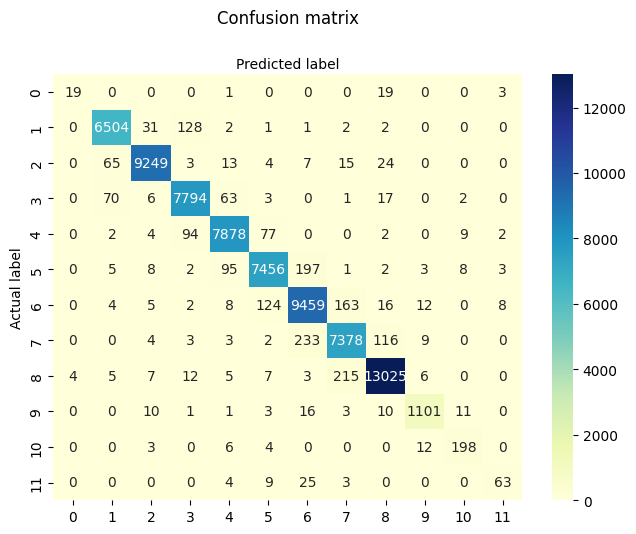

In [19]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import classification_report
target_names = soil_codes.keys()
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       OL-OH       0.83      0.45      0.58        42
       SW-SP       0.98      0.97      0.98      6671
       SW-GW       0.99      0.99      0.99      9380
       SM-SP       0.97      0.98      0.97      7956
       SM-ML       0.98      0.98      0.98      8068
       ML-MH       0.97      0.96      0.96      7780
       MH-CL       0.95      0.97      0.96      9801
       CL-CH       0.95      0.95      0.95      7748
          CH       0.98      0.98      0.98     13289
       CH-CL       0.96      0.95      0.96      1156
       SC-SM       0.87      0.89      0.88       223
       OL-CH       0.80      0.61      0.69       104

    accuracy                           0.97     72218
   macro avg       0.94      0.89      0.91     72218
weighted avg       0.97      0.97      0.97     72218

